In [2]:
import io
import os
import tarfile as tf
import urllib as ul

import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
#seaborn-darkgrid
from sklearn.model_selection import train_test_split

In [3]:
file_url = "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.tgz"
data_folder = os.path.join("dataset", "housing")

In [4]:
resp = ul.request.urlopen(file_url,)
byte_array = resp.read()
file_like_object = io.BytesIO(byte_array)
housing_tar = tf.open(fileobj=file_like_object)
housing_tar.extractall(path=data_folder)

In [5]:
df = pd.read_csv(os.path.join(data_folder, "housing.csv"))

In [6]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
df.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

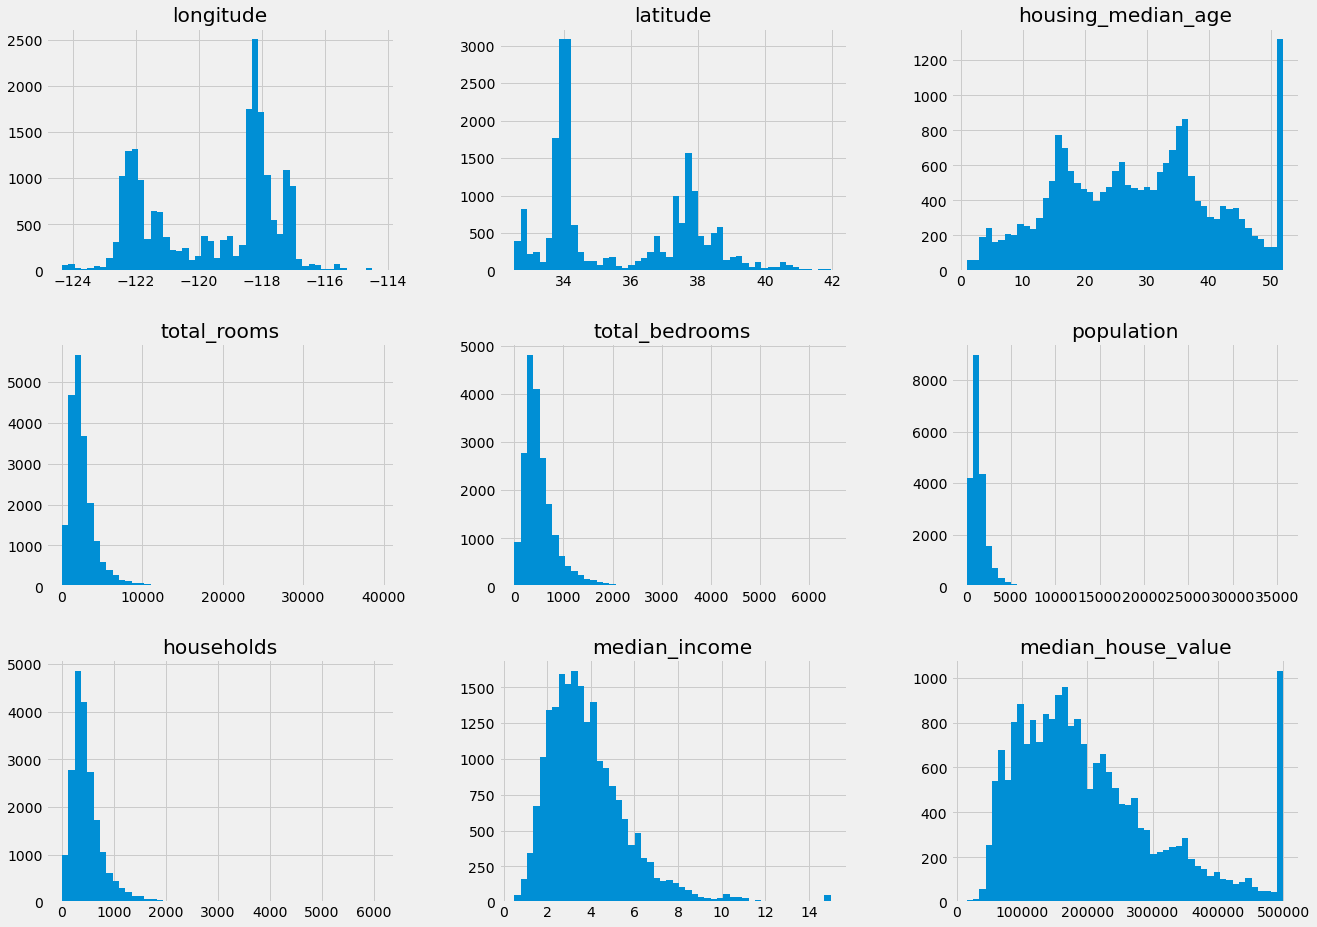

In [10]:

df.hist(bins=50,figsize=(20,15))
plt.show()

In [11]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)
print(train_set.size)
print(test_set.size)


165120
41280


Added income categories to represent income in categories

In [12]:
df["income_cat"] = pd.cut(
    df.median_income, bins=[0.0, 1.5, 3.0, 4.5, 6.0, np.inf], labels=[1, 2, 3, 4, 5]
)

In [13]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


<AxesSubplot:>

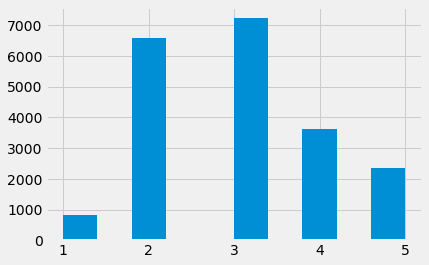

In [14]:
df.income_cat.hist()

In [15]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(df, df["income_cat"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [16]:
strat_train_set["income_cat"].value_counts() / len(strat_train_set)

3    0.350594
2    0.318859
4    0.176296
5    0.114402
1    0.039850
Name: income_cat, dtype: float64

Drop the income_cat columns



In [17]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

Keep copy of training set


In [18]:
housing = strat_train_set.copy()


Plot lat long as scatter plot

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

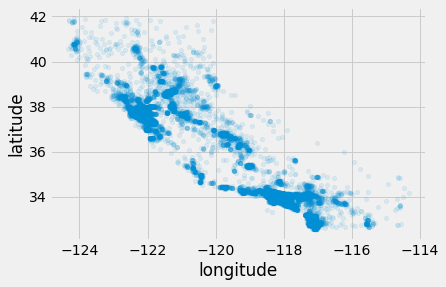

In [19]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

Plot prices and population
radius of circle s represent population density and the color c represents price

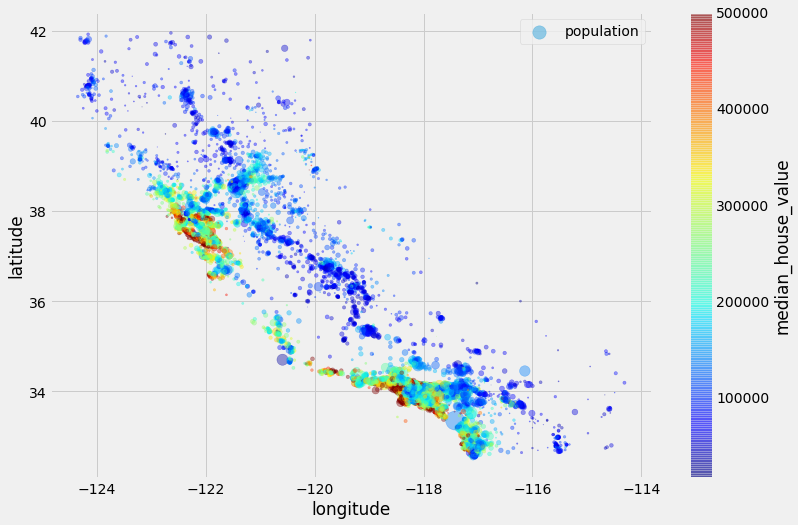

In [20]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
s=housing["population"]/100, label="population", figsize=(12,8),
c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

Correlation Matrix between features

In [21]:
corr_matrix = housing.corr()

corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

Plot scatter plot for correlations by using pandas scatter matrix

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

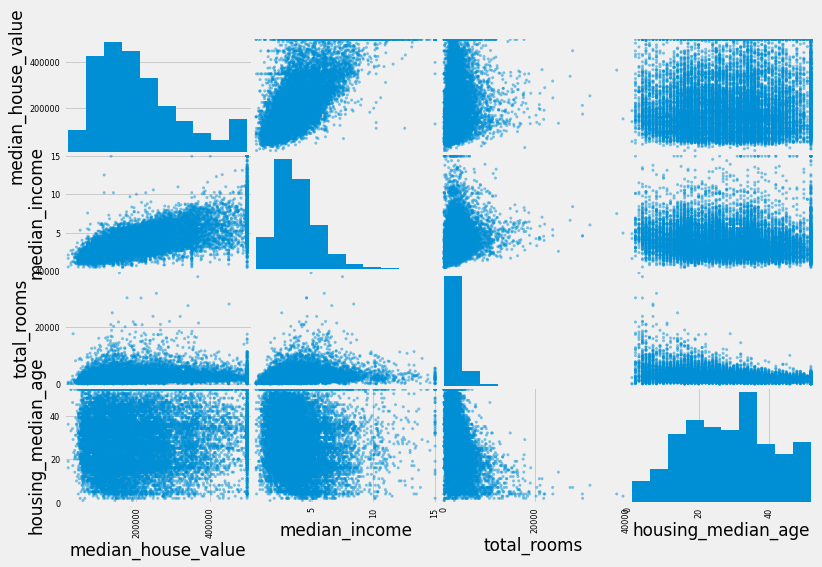

In [22]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms",
"housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

Zoom on to important feature

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

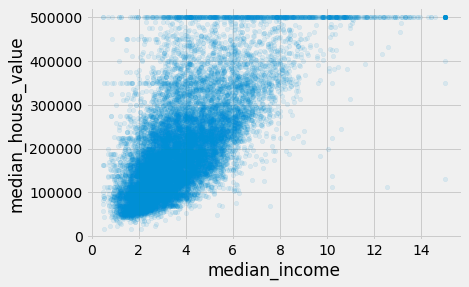

In [23]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
alpha=0.1)

Remove target variable

In [24]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

Data Cleaning

options
housing.dropna(subset=["total_bedrooms"])  #option 1
housing.drop("total_bedrooms", axis=1) # option 2
median = housing["total_bedrooms"].median() # option 3
housing["total_bedrooms"].fillna(median, inplace=True)

Replacing na with Imputer

In [25]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
housing_num = housing.drop("ocean_proximity", axis=1)
imputer.fit(housing_num)

print("With Stats from Imputer:", imputer.statistics_)
print("With median Function:", housing_num.median().values)

# it returns output as numpy array
X = imputer.transform(housing_num)

housing_tr = pd.DataFrame(X, columns=housing_num.columns)

With Stats from Imputer: [-118.51     34.26     29.     2119.5     433.     1164.      408.
    3.5409]
With median Function: [-118.51     34.26     29.     2119.5     433.     1164.      408.
    3.5409]


Handling categorical variable, ordered values

In [26]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
19480,INLAND
8879,<1H OCEAN
13685,INLAND
4937,<1H OCEAN
4861,<1H OCEAN


In [27]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
print("Category encoded values:", housing_cat_encoded[:10])

print("Categories:",  ordinal_encoder.categories_)

Category encoded values: [[0.]
 [0.]
 [4.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]]
Categories: [array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


Unordered values or values with no weightage

In [28]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
## Return sparse matrix instead of numpy array
### sparse matrix only stores non-zero element position
print(housing_cat_1hot)
print(cat_encoder.categories_)
housing_cat_1hot.toarray()

  (0, 0)	1.0
  (1, 0)	1.0
  (2, 4)	1.0
  (3, 1)	1.0
  (4, 0)	1.0
  (5, 1)	1.0
  (6, 0)	1.0
  (7, 1)	1.0
  (8, 0)	1.0
  (9, 0)	1.0
  (10, 1)	1.0
  (11, 1)	1.0
  (12, 0)	1.0
  (13, 1)	1.0
  (14, 1)	1.0
  (15, 0)	1.0
  (16, 3)	1.0
  (17, 1)	1.0
  (18, 1)	1.0
  (19, 1)	1.0
  (20, 0)	1.0
  (21, 0)	1.0
  (22, 0)	1.0
  (23, 1)	1.0
  (24, 1)	1.0
  :	:
  (16487, 1)	1.0
  (16488, 1)	1.0
  (16489, 4)	1.0
  (16490, 3)	1.0
  (16491, 0)	1.0
  (16492, 3)	1.0
  (16493, 1)	1.0
  (16494, 1)	1.0
  (16495, 0)	1.0
  (16496, 1)	1.0
  (16497, 3)	1.0
  (16498, 1)	1.0
  (16499, 0)	1.0
  (16500, 0)	1.0
  (16501, 0)	1.0
  (16502, 4)	1.0
  (16503, 0)	1.0
  (16504, 1)	1.0
  (16505, 1)	1.0
  (16506, 0)	1.0
  (16507, 1)	1.0
  (16508, 1)	1.0
  (16509, 1)	1.0
  (16510, 0)	1.0
  (16511, 3)	1.0
[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

Writing your own transformer

In [29]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6


class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):  # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room

    def fit(self, X, y=None):
        return self  # nothing else to do

    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[
                X, rooms_per_household, population_per_household, bedrooms_per_room
            ]
        else:
            return np.c_[X, rooms_per_household, population_per_household]


attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

Feature scaling
Can be done in 2 ways, minMax Scaling (MinMaxScaler) or standardization(StandardScaler)

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline(
    [
        ("imputer", SimpleImputer(strategy="median")),
        ("attribs_adder", CombinedAttributesAdder()),
        ("std_scaler", StandardScaler()),
    ]
)

housing_num_tr = num_pipeline.fit_transform(housing_num)


Applying transformers columns-wise

In [31]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]
full_pipeline = ColumnTransformer(
    [("num", num_pipeline, num_attribs), ("cat", OneHotEncoder(), cat_attribs),]
)
housing_prepared = full_pipeline.fit_transform(housing)

Train Linear regression model

In [32]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

Try out it on some data

In [33]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]

some_data_prepared = full_pipeline.transform(some_data)

print("Prediction:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Prediction: [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]
Labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


Find RMSE from Predictions

In [34]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
print("RMSE:", lin_rmse)

RMSE: 68628.19819848922


Try different model Decision Tree

In [35]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
print("RMSE:", tree_rmse)

# Indicates overfitting

RMSE: 0.0


Use K-fold cross validation

In [36]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(
    tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10
)

tree_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [69100.98936099 67512.88797362 71864.2706937  69777.99743664
 71196.47384265 76044.49409906 71802.67064818 70639.13571991
 77313.91102641 69308.61598901]
Mean: 71456.14467901792
Standard deviation: 2913.967129412337


Use Cross validation with Linear regression

In [37]:
lin_scores = cross_val_score(
    lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10
)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean: 69052.46136345083
Standard deviation: 2731.67400179835


Try Random forest

In [38]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
print("RMSE:", forest_rmse)

RMSE: 18686.650098688806


In [39]:
forest_scores = cross_val_score(
    forest_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10
)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [49252.96229478 47678.9932244  49999.3424101  51978.04917665
 49559.1492207  53001.15600822 48958.86632489 48046.3992643
 52907.58633774 50042.07943381]
Mean: 50142.45836955881
Standard deviation: 1794.7842166084588


Save model

In [40]:
import joblib

joblib.dump(forest_reg, "forest_reg.pkl")

['forest_reg.pkl']

Load model

In [41]:
forest_reg_loaded = joblib.load("forest_reg.pkl")

Hyperparameter Tuning, Grid Search

In [42]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'n_estimators' : [3, 10, 30], 'max_features' : [2, 4, 6, 8]}, 
{'bootstrap' : [False], 'n_estimators': [3, 10], 'max_features' : [2, 3, 4]}]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring="neg_mean_squared_error", return_train_score=True)

grid_search.fit(housing_prepared, housing_labels)


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [43]:
print("Best Params:", grid_search.best_params_)
print("Best Estimator:", grid_search.best_estimator_)
print("Best Score:", grid_search.best_score_)

Best Params: {'max_features': 6, 'n_estimators': 30}
Best Estimator: RandomForestRegressor(max_features=6, n_estimators=30)
Best Score: -2490596097.309001


In [44]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

64019.319946800126 {'max_features': 2, 'n_estimators': 3}
55533.1416830528 {'max_features': 2, 'n_estimators': 10}
53186.176744304794 {'max_features': 2, 'n_estimators': 30}
60205.296762133294 {'max_features': 4, 'n_estimators': 3}
52465.18782060729 {'max_features': 4, 'n_estimators': 10}
50801.43363798529 {'max_features': 4, 'n_estimators': 30}
59494.6440105882 {'max_features': 6, 'n_estimators': 3}
52074.92998823357 {'max_features': 6, 'n_estimators': 10}
49905.87237298834 {'max_features': 6, 'n_estimators': 30}
59360.722885047675 {'max_features': 8, 'n_estimators': 3}
52078.680759487695 {'max_features': 8, 'n_estimators': 10}
50048.09152064419 {'max_features': 8, 'n_estimators': 30}
62413.77900701692 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54715.80927770858 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60151.730860433105 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52816.8802352852 {'bootstrap': False, 'max_features': 3, 'n_estimators':

Best Features

In [45]:
feature_importances = grid_search.best_estimator_.feature_importances_
print("Feature Importance:", feature_importances)
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
print("Feature Importance with Name :\n", sorted(zip(feature_importances, attributes), reverse=True))

Feature Importance: [8.16040969e-02 6.94183400e-02 4.40322125e-02 1.58804282e-02
 1.71828798e-02 1.67237863e-02 1.62616184e-02 3.08270126e-01
 7.39731108e-02 1.10399212e-01 8.31048194e-02 1.33678790e-02
 1.40350736e-01 4.62499283e-05 2.62386365e-03 6.76064157e-03]
Feature Importance with Name :
 [(0.3082701258014246, 'median_income'), (0.14035073561844158, 'INLAND'), (0.11039921207603674, 'pop_per_hhold'), (0.08310481939821603, 'bedrooms_per_room'), (0.08160409686797321, 'longitude'), (0.07397311077461269, 'rooms_per_hhold'), (0.06941833998941069, 'latitude'), (0.04403221250232635, 'housing_median_age'), (0.017182879824337985, 'total_bedrooms'), (0.016723786296004725, 'population'), (0.01626161842068108, 'households'), (0.015880428246315824, 'total_rooms'), (0.0133678790392319, '<1H OCEAN'), (0.006760641566864624, 'NEAR OCEAN'), (0.002623863649868742, 'NEAR BAY'), (4.6249928253260435e-05, 'ISLAND')]


Evaluating System agains test set

In [46]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)


final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_rmse)

47653.77753636914


Confidence 

In [47]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
result = np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1, loc=squared_errors.mean(), scale=stats.sem(squared_errors)))

print(result)

[45686.41267656 49543.07947351]
